In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import pearsonr

In [58]:
# get the data:

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame= True)

In [10]:
x,y = fetch_california_housing(return_X_y = True, as_frame = True)

In [11]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
print(x.shape)
print(y.shape)

(20640, 8)
(20640,)


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


All are numerical attributes

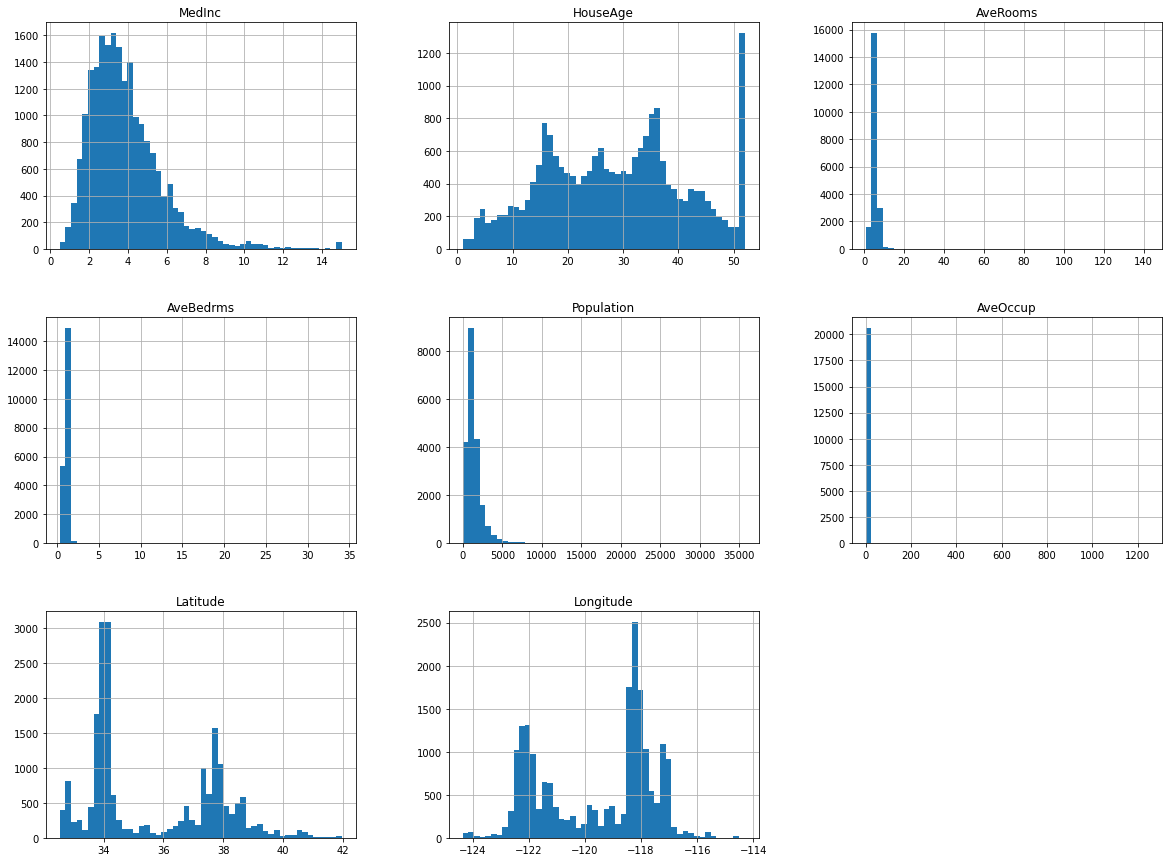

In [16]:
x.hist(bins=50, figsize = (20,15))
plt.show()

Most of the data is skewed in nature

In [18]:
# create a test set: Random sampling or the stratified sampling

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2,
                                                    random_state = 42)




In [19]:
x_train.shape, x_test.shape

((16512, 8), (4128, 8))

In [20]:
y_train.shape, y_test.shape

((16512,), (4128,))

<AxesSubplot:>

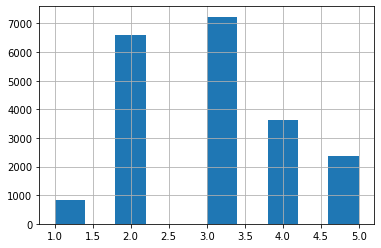

In [21]:
data_c  = x.copy()

data_c["income_cat"] = pd.cut(data_c['MedInc'], 
                              bins = [0.,1.5,3.0,4.5,6.,np.inf],
                              labels = [1,2,3,4,5])

data_c["income_cat"].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data_c, data_c['income_cat']):
  stratified_train_set = data_c.loc[train_index]
  stratified_test_set = data_c.loc[test_index]

In [24]:
stratified_test_set['income_cat'].value_counts()/len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [30]:
stratified_train_set['income_cat'].value_counts()/len(stratified_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

# plotting the data

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

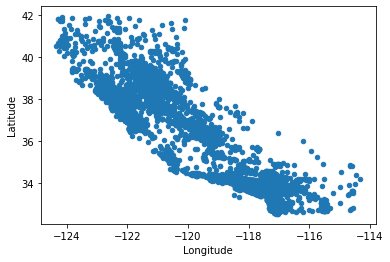

In [54]:
housing = stratified_train_set.copy()

housing.plot(kind = "scatter", x = "Longitude", y="Latitude")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

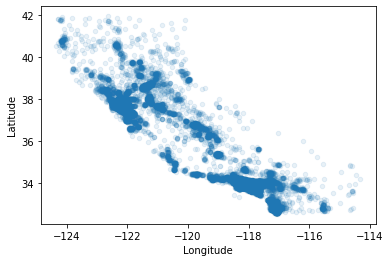

In [55]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)
# makes it easier to visualise where there are high density of data points

Our brains are very good at spotting patterns in pictures, but you may need to play
around with visualization parameters to make the patterns stand out.

In [56]:
housing["Price"] = y

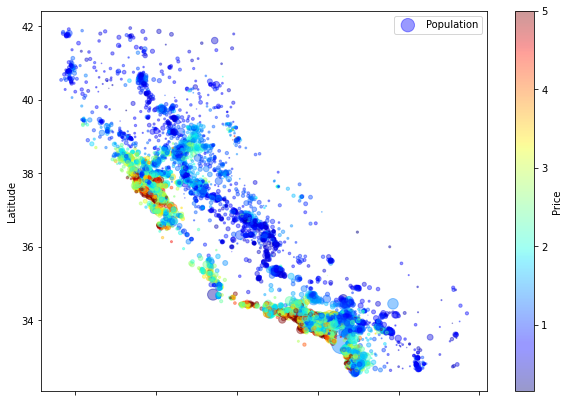

In [57]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=housing["Population"]/100, label="Population", figsize=(10,7),
c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density,

In [59]:
corr_matrix = housing.corr()

In [62]:
corr_matrix["Price"].sort_values(ascending=False)

Price         1.000000
MedInc        0.687151
AveRooms      0.146255
HouseAge      0.114146
AveOccup     -0.021991
Population   -0.026882
AveBedrms    -0.043294
Longitude    -0.047466
Latitude     -0.142673
Name: Price, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation;



```

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

```



# Data Cleaning:

## Train set

### Handle missing values


1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

```
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

```



In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [65]:
imputer.fit(x_train)

SimpleImputer(strategy='median')

In [67]:
imputer.statistics_ # gives the median of each attribute

array([ 3.54580000e+00,  2.90000000e+01,  5.23587365e+00,  1.04928557e+00,
        1.16700000e+03,  2.81723971e+00,  3.42600000e+01, -1.18510000e+02])

In [68]:
x_train = imputer.transform(x_train)

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [88]:
x_train_scl = scaler.transform(x_train)

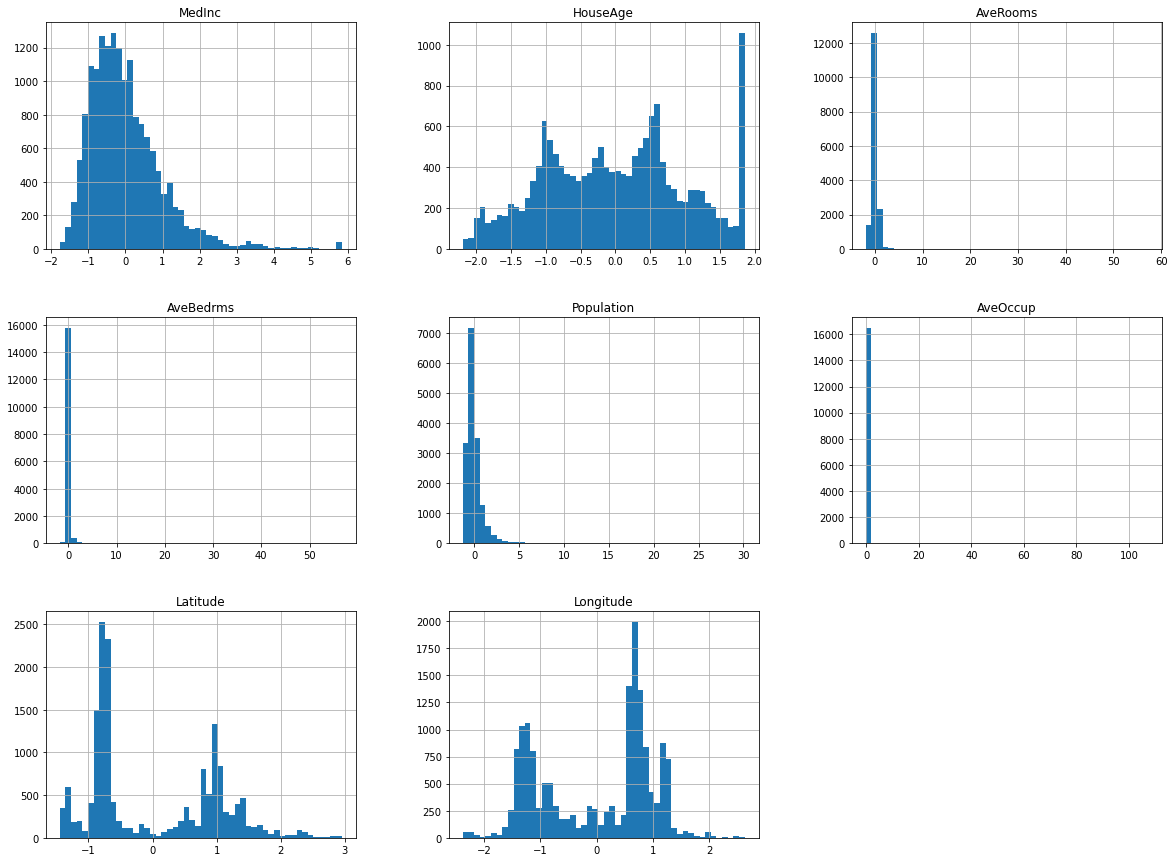

In [93]:
df = pd.DataFrame(x_train_scl,columns = x.columns)

df.hist(bins=50, figsize = (20,15))
plt.show()

In [94]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [83]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.233159,0.541339,0.032239,0.030168,0.039896,0.001935,0.329058,0.474871
std,0.131329,0.247108,0.016929,0.017121,0.031869,0.009318,0.227305,0.199766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142536,0.333333,0.025267,0.026604,0.022030,0.001397,0.146809,0.252988
50%,0.210059,0.549020,0.030825,0.028295,0.032624,0.001710,0.181915,0.581673
75%,0.294705,0.705882,0.036677,0.030313,0.048292,0.002082,0.550000,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
x.index

RangeIndex(start=0, stop=20640, step=1)